# Machine Learning Project
## House Price Prediction For United States(USA).

# 1, First We Import Necessary Libraries.

In [1]:
import pandas as pd  # For loading and manipulating data (like CSV files).
import numpy as np   # For numerical operations, arrays, and matrix math.
import matplotlib.pyplot as plt  # For Visualization Purpose.
import seaborn as sns    # For Visualization Purpose on the top of matplotlib.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb 

import joblib # For Deployment.

# 2, Load the dataset By Using Pandas.

In [2]:
housing_data = pd.read_csv("C:/Users/dell/Desktop/Python/USA Housing Dataset.csv")


In [3]:

# Display the first few rows of the dataset
print("First five rows of the dataset:")
housing_data.head()  # Used to see the first 5 observation.

First five rows of the dataset:


,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Sqft_above,Sqft_basement,Year_built,Year_renovated,Street,City,Statezip(Zip code),Country
0,5/9/2014 0:00,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,5/9/2014 0:00,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,5/9/2014 0:00,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,5/9/2014 0:00,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,5/10/2014 0:00,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


## ✍️ Descriptions of Variables ( Attributes).

* Date : The date when the property was sold.
 
* ©→ Price : The sale price of the property in USD. This is the target variable we aim to predict.

* Bedrooms : The number of bedrooms in the property. Generally, properties with more bedrooms tend to have higher prices.

* Bathrooms : The number of bathrooms in the property. Similar to bedrooms, more bathrooms can increase a property’s value.

* Sqft Living: The size of the living area in square feet. Larger living areas are typically associated with higher property values.

* Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s desirability and value.

* Floors : The number of floors in the property. Properties with multiple floors may offer more living space and appeal.

* Waterfront : A binary indicator (1 if the property has a waterfront view, 0 other-wise). Properties with waterfront views are often valued higher.

* View : An index from 0 to 4 indicating the quality of the property’s view. Better views are likely to enhance a property’s value.

* Condition : An index from 1 to 5 rating the condition of the property. Properties in better condition are typically worth more.

* Sqft Above : The square footage of the property above the basement. This can help isolate the value contribution of above-ground space.

* Sqft Basement : The square footage of the basement. Basements may add value depending on their usability.

* Yr Built: The year the property was built. Older properties may have historical value, while newer ones may offer modern amenities.

* Yr Renovated: The year the property was last renovated. Recent renovations canincrease a property’s appeal and value.

* Street: The street address of the property. This feature can be used to analyzelocation-specific price trends.

* City: The city where the property is located. Different cities have distinct market dynamics.

* Statezip(Zip Code): The state and zip code of the property. This feature provides regional context for the property.

* Country: The country where the property is located. While this dataset focuses on properties in Australia, this feature is included for completeness.

In [4]:
# Check the shape of the dataset (number of rows and columns).
print("Shape of the dataset:", housing_data.shape)

Shape of the dataset: (4140, 18)


## Explanation of the above 3 codes :

* pd.read_csv() :  reads the CSV file into a Pandas DataFrame.

* .head() :  shows the first five rows to understand the structure.

* .shape :  returns the number of rows and columns.

# 3, Data Preprocessing and EDA.
## 👉 Handling Missiing Values,Duplicates,Outliers and also Feature Engineering.
* Before We train a model, we need to ensure that missing values are properly handled.

# Data Inspection

 * Display The Summary of the Dataset including data types and non-null counts & Memory usage.


In [5]:
print("Summary of the Dataset :")
housing_data.info()

Summary of the Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4140 non-null   object 
 1   Price               4140 non-null   float64
 2   Bedrooms            4140 non-null   int64  
 3   Bathrooms           4140 non-null   float64
 4   Sqft_living         4140 non-null   int64  
 5   Sqft_lot            4140 non-null   int64  
 6   Floors              4140 non-null   float64
 7   Waterfront          4140 non-null   int64  
 8   View                4140 non-null   int64  
 9   Condition           4140 non-null   int64  
 10  Sqft_above          4140 non-null   int64  
 11  Sqft_basement       4140 non-null   int64  
 12  Year_built          4140 non-null   int64  
 13  Year_renovated      4140 non-null   int64  
 14  Street              4140 non-null   object 
 15  City                4140 non-n

### 👌 What information should we get from info().

* total observations: 4140: make sure you understand what is each observation. In this case, each observation is the data about a district.
* total columns (features): 18 columns.
* data type of each feature: 13 numbers and 5 objects.
* Null value : How many null value we have in each column.
* meaning of each feature: it is very important to work with domain expert to fully understand each feature any null values.&
* Memory consumption : 582.3+ KB.

## Check for Missing value and Handle the Missing if the Data has null value.

## Check For Missing Value.

In [6]:
housing_data.isnull().sum()    # used to check for missing value.

Date                  0
Price                 0
Bedrooms              0
Bathrooms             0
Sqft_living           0
Sqft_lot              0
Floors                0
Waterfront            0
View                  0
Condition             0
Sqft_above            0
Sqft_basement         0
Year_built            0
Year_renovated        0
Street                0
City                  0
Statezip(Zip code)    0
Country               0
dtype: int64

#### ☝️ As we can see from the above output the dataset has No Missing value. so its good to continue to the next.

## Check for Duplicate values.

In [7]:
housing_data.duplicated().sum()  # used to see how many duplicate values we have.

0

#### ☝️ As we can see from the above output we have No duplicate values . so its good to continue to the next step.

###  📤Droping un-used Data (Attributes) From the Dataset.

* droping un-used Data since all the values are the same for each observations the remaining attributes are enough for the model.

In [8]:
housing_data1 = housing_data.copy()

In [9]:
housing_data1 = housing_data1.drop(['Waterfront'],axis=1)

In [10]:

housing_data1 = housing_data1.drop(['Country'],axis=1)


In [11]:
housing_data1 = housing_data1.drop(['View'],axis=1)

In [12]:
print("After Droping the attribute ; shape of Dataset: ")

housing_data1.shape

After Droping the attribute ; shape of Dataset: 


(4140, 15)

## Describe the Summary Statistics of the Dataset For Numerical column.

In [13]:
print("Summary Statistics of the Dataset :")
housing_data2 = housing_data1.copy()
housing_data2.describe()

Summary Statistics of the Dataset :


,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Condition,Sqft_above,Sqft_basement,Year_built,Year_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


### 👌 What information should we get from describe().
* describe() →  shows a summary of numerial features like mean,standard deviation and the other, which can be visualized using boxplots and histograms. 
* value_counts() →  can be used to generate a summary of categorical features

### Removing Extreme Outlier.

In [14]:
# Only remove extreme top 1% (not too much data)
for col in ['Price', 'Sqft_living', 'Sqft_lot', 'Sqft_above', 'Sqft_basement']:
    upper_limit = housing_data2[col].quantile(0.99)
    lower_limit = housing_data2[col].quantile(0.01)
    housing_data2 = housing_data2[(housing_data2[col] < upper_limit) & (housing_data2[col] > lower_limit)]

##  ✅ Check Outliers for Numerical Columns on boxplot By Using Function.

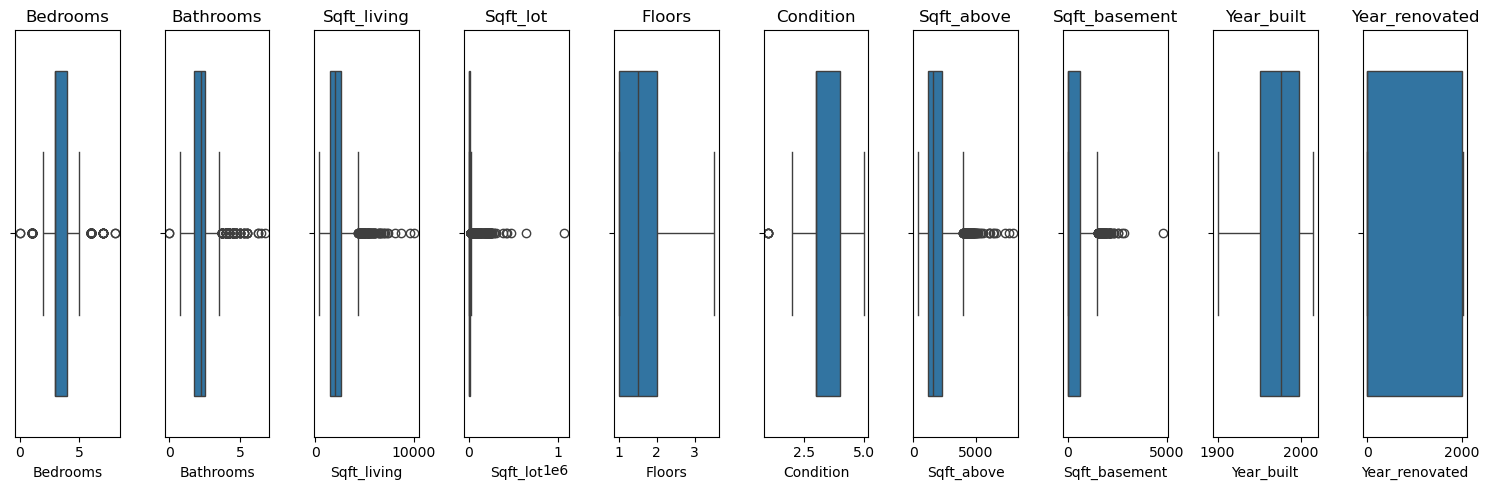

In [15]:
# Select numeric columns (excluding object types).
numerical_columns = list(housing_data1.select_dtypes(exclude=['object']))
# Remove 'Price' if we want to exclude it.
numerical_columns = [col for col in numerical_columns if col != 'Price']
# Create a figure with subplots in a single row.
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5))
# Plot each boxplot in its own subplot.
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=housing_data1[col], ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()  # Adjust spacing between plots.
plt.show()

## 🔁replace outliers with some threshold min & max values By using Function.

#### →☝️ As we can see from the above box plot the column Bedrooms , Bathrooms , sqft_living , sqft_lot , waterfront , View , Condition , Sqft_above , Sqft_basement have outliers.so we should have to replace by using some techniques.

In [16]:
def getMinAndMaxRange(col):
    Q1 = housing_data1[col].quantile(0.25)
    Q3 = housing_data1[col].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    return min_value, max_value

def replaceOutliers(col):
    min_value, max_value = getMinAndMaxRange(col)
    housing_data1[col] = np.where(housing_data1[col] < min_value, min_value, housing_data1[col])
    housing_data1[col] = np.where(housing_data1[col] > max_value, max_value, housing_data1[col])
    
numerical_columns =  list(housing_data1.select_dtypes(exclude=['object']))
for col in numerical_columns:
    if col != 'Price': replaceOutliers(col)

## 🕑 After Replacing the Outlier the boxplot seems like....

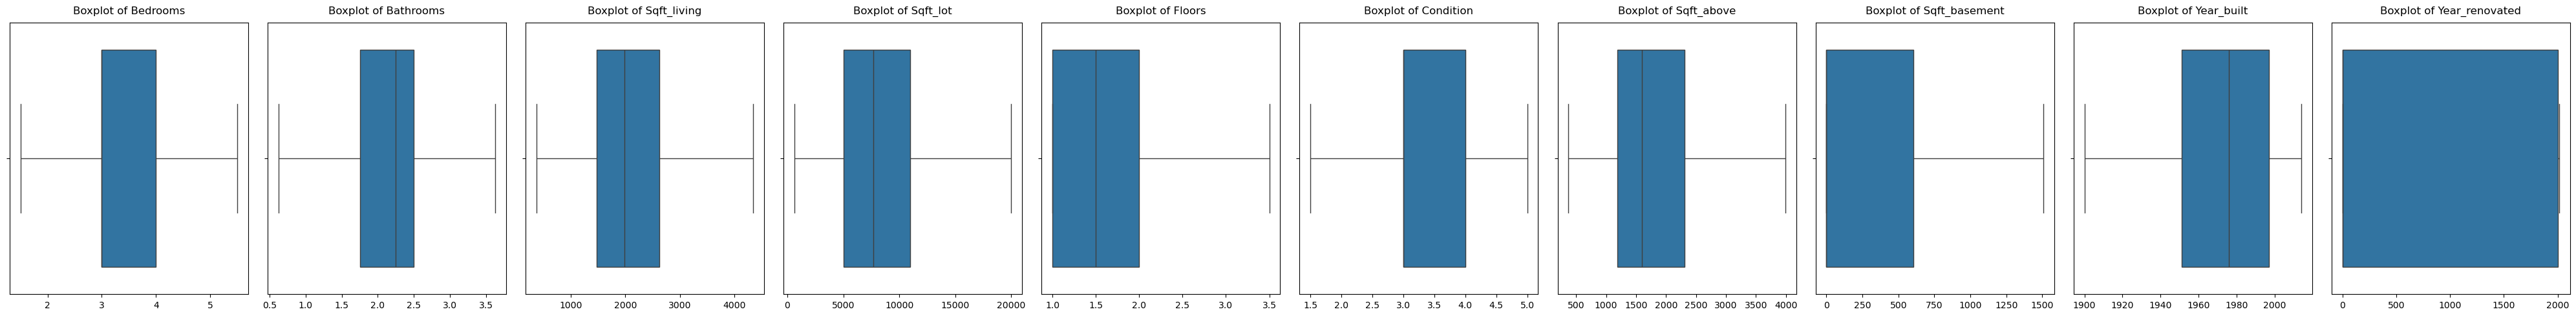

In [17]:
# Select numeric columns (excluding 'object' type).
numerical_columns = list(housing_data1.select_dtypes(exclude=['object']))
# Remove 'Price' if you want to exclude it.
numerical_columns = [col for col in numerical_columns if col != 'Price']
# Set up subplots: 1 row, N columns (side by side).
fig, axes = plt.subplots(
    nrows=1,  # Single row.
    ncols=len(numerical_columns),  # One column per numeric variable.
    figsize=(4 * len(numerical_columns), 5)  # Adjust width dynamically.
)
# Plot boxplots horizontally.
for ax, col in zip(axes, numerical_columns):
    sns.boxplot(x=housing_data1[col], ax=ax)
    ax.set_title(f'Boxplot of {col}', pad=10)  # Add padding to title.
    ax.set_xlabel('')

plt.tight_layout()  # Prevent overlap.
plt.show()

### # Applying a log transformation (log1p) to some numerical columns that are heavily skewed.

In [18]:

# Apply log1p (log(1+x)) to heavily skewed features
 # log(1+x) to handle zeros.
for col in ['Price', 'Sqft_living', 'Sqft_lot', 'Sqft_above', 'Sqft_basement']:
    housing_data2[col] = np.log1p(housing_data2[col])

## Encode categorical (non-numeric) columns into numeric format using Ordinal Encoder.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# Define the columns you want to encode.
categorical_cols = ['City', 'Street', 'Statezip(Zip code)']

# Create the encoder.
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the categorical columns on the full dataset.
housing_data2[categorical_cols] = encoder.fit_transform( housing_data2[categorical_cols])

### 🎯 In machine learning, feature encoding (e.g., One-Hot Encoding, Label Encoding) should be applied after splitting the data into train and test sets to avoid data leakage.
 ## ❓ Why After Splitting
* 1, Data Leakage Risk : If you encode before splitting, the test set influences the encoding (e.g., categories/means/scaling parameters are derived from the entire dataset), leading to overly optimistic performance estimates.
* 2, Real-world analogy: In production, you won’t have future (test) data to guide encoding—so the encoder should learn only from training data.

#### # Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [20]:
housing_data2['Floors'].value_counts().to_frame()

,count
Floors,
1.0,958
2.0,335
1.5,166
3.0,14
2.5,13


## # Correlation Matrix Used to see the correlation between variable.

In [21]:
numeric_data = housing_data2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix) 

                       Price  Bedrooms  Bathrooms  Sqft_living  Sqft_lot  \
Price               1.000000  0.192392   0.449193     0.574148  0.005580   
Bedrooms            0.192392  1.000000   0.417082     0.509412  0.201324   
Bathrooms           0.449193  0.417082   1.000000     0.638400  0.039303   
Sqft_living         0.574148  0.509412   0.638400     1.000000  0.369160   
Sqft_lot            0.005580  0.201324   0.039303     0.369160  1.000000   
Floors              0.379546  0.064216   0.499708     0.319300 -0.342049   
Condition           0.169515  0.051884  -0.051811     0.079822  0.043431   
Sqft_above          0.581294  0.386638   0.658014     0.869943  0.270924   
Sqft_basement       0.239651  0.407203   0.270354     0.639965  0.334244   
Year_built         -0.125473  0.033765   0.376250     0.120256  0.040555   
Year_renovated     -0.063755 -0.013929  -0.198484    -0.078558  0.086541   
Street              0.099493 -0.064076  -0.048233    -0.045980 -0.149486   
City        

## 💳 Visualizing the Correlation Matrix.

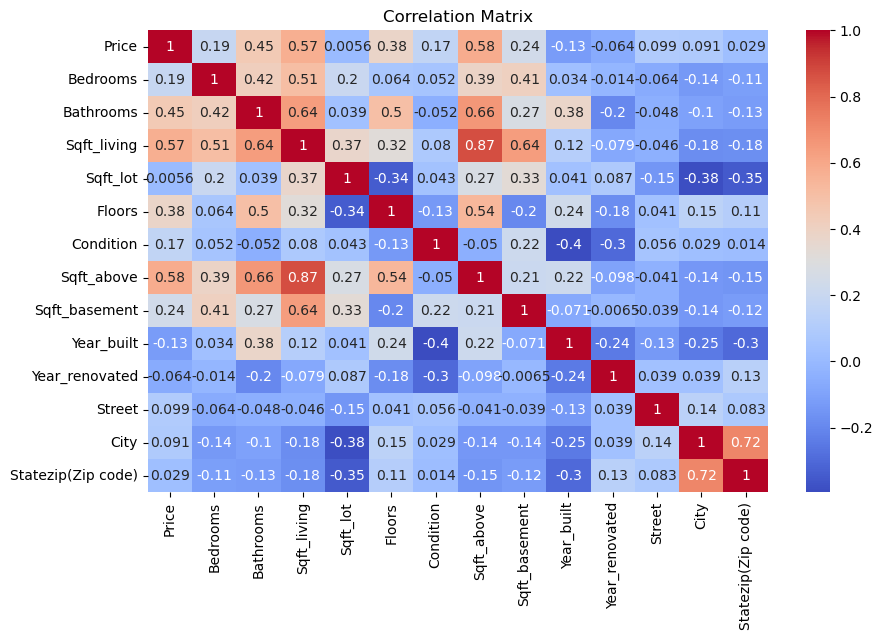

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(housing_data2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## ✍️ Interprete the above Correlation matrix to see the relationship Between variables.

### 🎯Strongest Correlations (|r| > 0.7)
* Sqft_living and Bathrooms (0.64) as well as Sqft_living and Bedrooms (0.51) are strongly correlated, indicating that larger homes tend to have more bedrooms and bathrooms.
* Sqft_living ↔ Price (0.57)

### Moderate Positive Correlations: 
* Bathrooms (0.45), Floors (0.38), and View (0.37) also show moderate positive correlations with Price, suggesting that more bathrooms, more floors, and better views are associated with higher property values.

### Weak Correlation:
* Sqft_lot (0.006) and Waterfront (0.11) have very weak correlations with Price, indicating that lot size and waterfront presence do not strongly influence price in this dataset.

### Negative Correlations: 
* Year_built (-0.13) and Year_renovated (-0.06) show weak negative correlations with Price, possibly reflecting that older or less recently renovated homes may be less expensive, though the relationship is not strong.

* Sqft_lot and LivingLot_Ratio (-0.88) have a strong negative correlation, as expected: as lot size increases, the ratio of living area to lot size decreases.



## ✅ Actionable Insights.
#### Multicollinearity Alert:
* Remove Sqft_above (or Sqft_living) to avoid redundancy in regression models.
#### Feature Engineering:
* Investigate why Condition negatively correlates with Year_built—is the metric flawed ?
#### Price Drivers:
* Focus on Sqft_living, Bathrooms, and Bedrooms—they have the strongest ties to price.



In [23]:
# Remove Sqft_above to avoid redundancy in regression models.
housing_data2 = housing_data2.drop(['Sqft_above'],axis = 1)
housing_data2.shape

(1486, 14)

### ✌️ how strongly each numeric feature in the dataset correlates with the Price variable (target variable).

In [24]:
# Calculate correlation only for numeric columns.
numeric_cols = housing_data2.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

# Now  sort correlations with Price.
correlation_matrix['Price'].sort_values(ascending=False)

Price                 1.000000
Sqft_living           0.574148
Bathrooms             0.449193
Floors                0.379546
Sqft_basement         0.239651
Bedrooms              0.192392
Condition             0.169515
Street                0.099493
City                  0.090650
Statezip(Zip code)    0.028733
Sqft_lot              0.005580
Year_renovated       -0.063755
Year_built           -0.125473
Name: Price, dtype: float64

## Distributions of Numerical Variables.

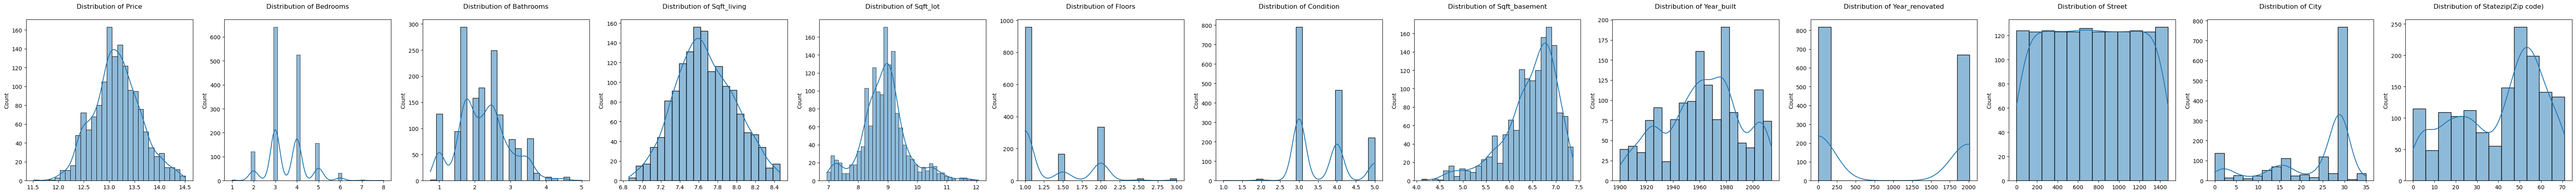

In [25]:
# Select numeric columns
numeric_data = housing_data2.select_dtypes(include=['int64', 'float64'])
# Set up subplots: 1 row, N columns (side by side).
fig, axes = plt.subplots(
    nrows=1,  # Single row
    ncols=len(numeric_data.columns),  # One column per numeric variable
    figsize=(5 * len(numeric_data.columns), 5) ) # Width adjusts to number of columns

# Plot distributions horizontally.
for ax, column in zip(axes, numeric_data.columns):
    sns.histplot(data=numeric_data, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}', pad=20)  # Add padding to title
    ax.set_xlabel('')

plt.tight_layout()  # Prevent overlap.
plt.show()

## 5, Model Development

## # Define X and y.

In [26]:
# Define X and y
X = housing_data2.drop('Price', axis=1) # Feature variables without the target variable.
y = housing_data2['Price']  # y is the dependent variable (target) — the value our model is learning to predict.



In [27]:
print(f"X shape before split: {X.shape}")
print(f"y shape before split: {y.shape}")

X shape before split: (1486, 13)
y shape before split: (1486,)


## # Train/Test Split

In [28]:
# Train/Test Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
# Verify shapes after splitting.
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1188, 13)
X_test shape: (298, 13)


### ✍️X_train : Features (inputs) for training the model.

### 🎯 y_train : Target variables (outputs) for training.

### ✍️ x_test : Features (inputs) for testing the model's predictions.

### 🎯 y_test : Target labels (outputs) for testing and evaluating predictions.

In [33]:
# First, define the correct feature names manually.
feature_names = ['Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot', 'Floors',
                 'Condition', 'Sqft_basement', 'Year_built', 'Year_renovated',
                 'City', 'Street', 'Statezip(Zip code)']

# Then convert your X_train back to DataFrame.
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)

### ✍️ Explanations of the above code.

* We explicitly listing all the features (columns) for our model will use.
* This is especially helpful if the features were transformed and the column names were lost (e.g., using scikit-learn pipelines, encoders, or .values).
* After transformations, X_train and X_test might become NumPy arrays, which don't have column names.
* This code converts them back into pandas DataFrames and reassigns column labels using feature_names.



In [34]:
# Convert Date
housing_data2['Date'] = pd.to_datetime(housing_data2['Date'])
# housing_data2['Year_Sold'] = housing_data2['Date'].dt.year
housing_data2['Month_Sold'] = housing_data2['Date'].dt.month
housing_data2.drop('Date', axis=1, inplace=True)

# Add interaction features manually.
housing_data2['LivingLot_Ratio'] = housing_data2['Sqft_living'] / housing_data2['Sqft_lot']
# Create additional features
housing_data2['Total_Sqft'] = housing_data2['Sqft_living'] + housing_data2['Sqft_basement']




#### Summary: Why The above code is Useful ?
* Helps the model understand seasonal trends (Month_Sold).
* Improves feature richness with a custom ratio (LivingLot_Ratio).
* Prepares the data in a clean, model-friendly format.



## # Feature Distribution Comparision for training and testing For some Feature.

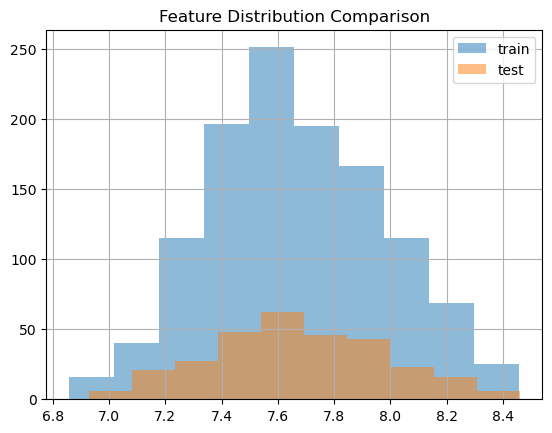

In [39]:
X_train['Sqft_living'].hist(alpha=0.5, label='train')
X_test['Sqft_living'].hist(alpha=0.5, label='test')
plt.legend()
plt.title('Feature Distribution Comparison')
plt.show()


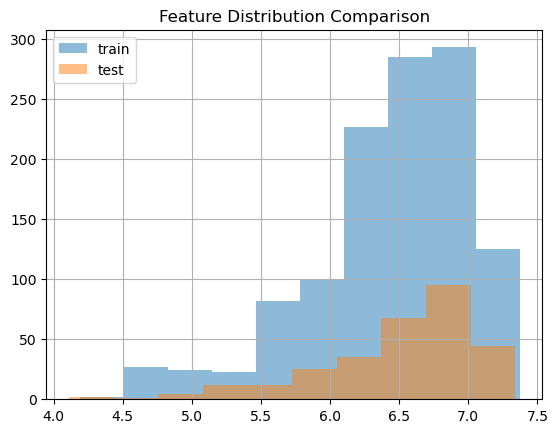

In [40]:
X_train['Sqft_basement'].hist(alpha=0.5, label='train')
X_test['Sqft_basement'].hist(alpha=0.5, label='test')
plt.legend()
plt.title('Feature Distribution Comparison')
plt.show()

## XGBOOST
* builds many small decision trees.

In [61]:

# Define the model
xgb_model = xgb.XGBRegressor(
    max_depth = 2,   # slightly deeper trees to capture non-linearities,max_depth(model complexity).
    learning_rate = 0.08,  # if we decrease the learning_rate the value of r square is Decreased for both training and testing and The value of RMSE for training is Increased.
                          # smaller steps to prevent overfitting.
    
    n_estimators = 1000,  # if we increase  n_estimators the value of r square is incresed for only training,and minimizing the value of RMSE for training.
    objective = 'reg:squarederror',
    subsample = 0.9 ,           # use 90% of samples for each tree.
    colsample_bytree = 0.8,      # use 70% of features for each tree.
    random_state = 42,  # For Reproducibility.
    reg_alpha = 1.5,              # L1 regularization (forces sparsity).
    reg_lambda = 1.8,       # L2 regularization.
    min_child_weight = 2,  # minimum sum of instance weight (hessian) needed in a child.
    )

# Fit the model
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Make predictions for both train and test datasets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model using RMSE and R-squared for both dataset.
rmse_train = root_mean_squared_error(y_train, y_train_pred)

r2_train = r2_score(y_train, y_train_pred)

rmse_test = root_mean_squared_error(y_test, y_test_pred)

r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R²: {r2_test:.4f}")

Train RMSE: 0.1883
Train R²: 0.8394
Test RMSE: 0.2260
Test R²: 0.7513


### ✍️  The above result is clearly Overfit but we comapre it with Linear regression 
#### For Linear Regression
* Train RMSE: 0.1687
* Train R²: 0.5041
* Test RMSE: 0.2527
* Test R²: 0.4926
### So, by underfitting on Linear Regression we can choose the xgboost Model.

## 🔍 Why XGBoost Performs Better ? 

#### 1,Nonlinear Relationships :
* XGBoost can model complex, nonlinear relationships between features and the target.
* Linear Regression assumes a straight-line relationship — which often doesn't reflect reality, especially in datasets like house prices.
#### 2,Feature Interactions :
* XGBoost automatically captures interactions between features (e.g., Bedrooms × Sqft_living).
* Linear Regression doesn’t handle interactions unless you manually add them.
#### 3,Robustness to Outliers:
* XGBoost is more robust to outliers and noise, thanks to tree-based learning and regularization.
* Linear regression is sensitive — one extreme value can pull the regression line significantly.
#### 4,Regularization:
* XGBoost has built-in L1 and L2 regularization to avoid overfitting( But we can use manually like we use from our xgboost model.
* Linear regression often needs manual tuning (e.g., Ridge, Lasso) for regularization.
#### 5,Handling Non-Normality:
* House price data is often not normally distributed and contains skewed features.
* XGBoost doesn't require normally distributed errors; linear regression does for its assumptions to hold.

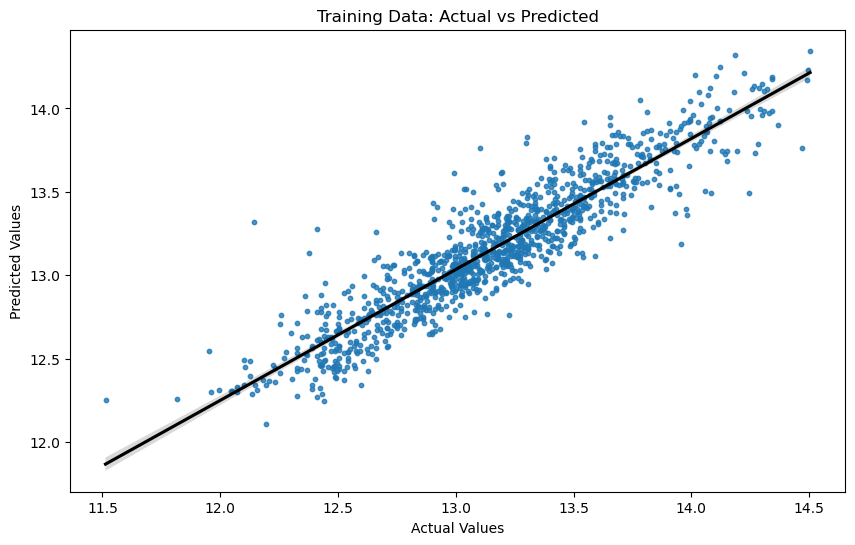

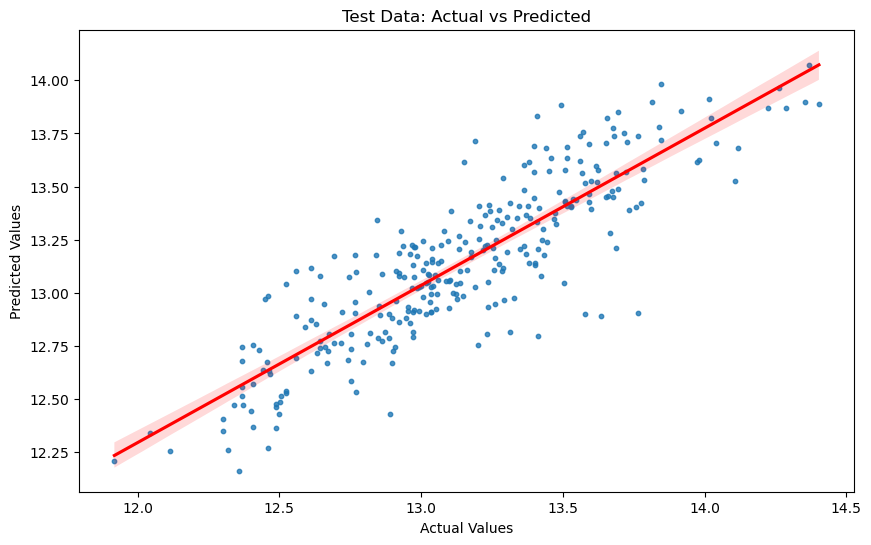

In [62]:
# Scatter plot for Training Data with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train, y=y_train_pred, scatter_kws={'s': 10}, line_kws={'color': 'black'})
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Scatter plot for Test Data with Regression Line.
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


## Residuals Plot Run this after Run the train and test split.

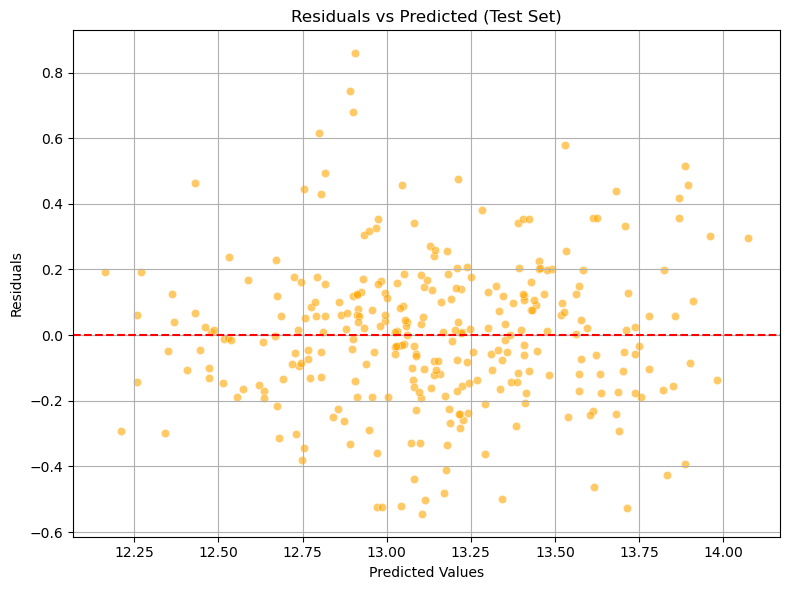

In [64]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals, color='orange', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ This is good  🤷🏻 residuals look like random noise → Our model is doing well.

## ✅ What a Good Residual Plot Looks Like
* Randomly scattered points around the horizontal line at 0 (no obvious pattern).
* Even spread of residuals across all predicted values.

## 🤷‍♂️ Residual Distribution By Visualization.

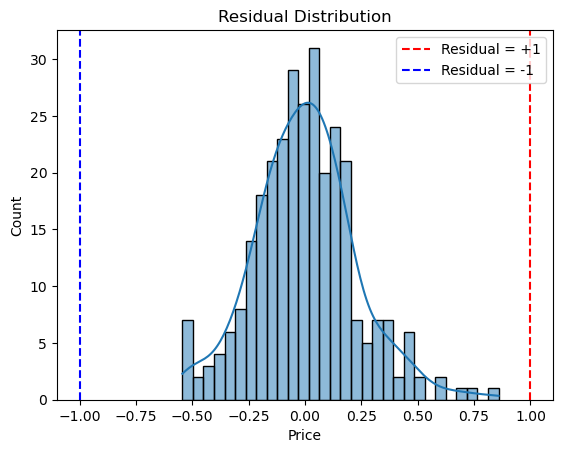

In [65]:
residuals = y_test - y_test_pred
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(1, color='red', linestyle='--', label='Residual = +1')
plt.axvline(-1, color='blue', linestyle='--', label='Residual = -1')
plt.title("Residual Distribution")
plt.legend()
plt.show()

## 👩🏻‍💻 summarizes metrics by Visualization.

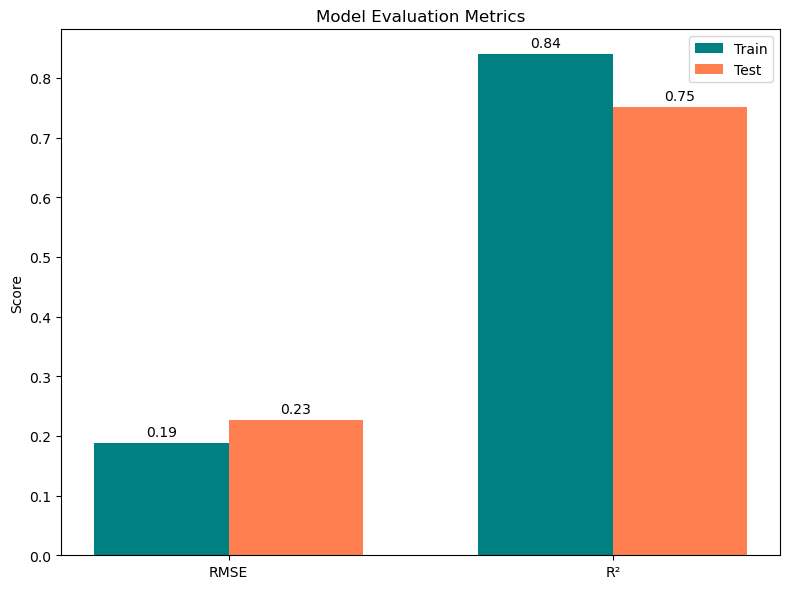

In [66]:
metrics = ['RMSE', 'R²']
train_scores = [rmse_train, r2_train]
test_scores = [rmse_test, r2_test]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train', color='teal')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='coral')

ax.set_ylabel('Score')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()


## # New(Unseen Data)

In [67]:
# Manually enter your feature values as a list or dictionary
new_data = {
    'City': 'Seattle',  
    'Street': 'Main St',
    'Statezip(Zip code)': '98101',
    'Sqft_living': 2500,
    'Sqft_lot':7.333600,
    'Condition':6,
    'Sqft_basement':5.555878,
    'Year_built':1978,
    'Bedrooms': 3,
    'Bathrooms': 2,
    'Floors': 1.0,  
    'Year_renovated': 2010
}

# Convert to a pandas DataFrame (same structure as your training data)
X_new = pd.DataFrame([new_data])  #  Wrap the dictionary in a list to make a single-row DataFrame. i.e[].

# If necessary, apply the same preprocessing as for training data
X_new[categorical_cols] = encoder.transform(X_new[categorical_cols])  # If you used label encoding

# Reorder the columns to match the model's training input
X_new = X_new[X_train.columns]



## $ Prediction on Unseen Data.

In [68]:
# Predict the target (house price in this case)
y_new_pred = xgb_model.predict(X_new)

# Display the predicted value
print(f"Predicted Value for New Data: {y_new_pred[0]:.2f}")   # The result show by logarithm value so we shoud have to transform it .


Predicted Value for New Data: 13.90


## ✅ How to Convert the Prediction Back :
###  Our model predicted 13.69 becausse we used np.log1p during training, then convert the prediction back to the original scale using:

### # Inverse transformation.

In [69]:
# Inverse of log1p is expm1 (i.e., exp(x) - 1)
# np.expm1(x) calculates the inverse of np.log1p(x) (which is log(x + 1)).
original_price = np.expm1(13.69)  # In this context, the model output 13.69 is assumed to be in log-transformed price (log(price + 1)).
print(f"Predicted House Price: ${original_price:,.2f}")


Predicted House Price: $882,045.45


# 🎯 Best Practice for Inverse Transformation Using function.

In [70]:
def predict_house_price(input_data, model, encoder, feature_order, categorical_cols):
    """
    Predict house price from raw input using a trained model and encoder.
Parameters:
    - input_data: dict with raw input (e.g., {'Bedrooms': 3, 'City': 'Seattle', ...})
    - model: trained XGBRegressor model.
    - encoder: fitted OrdinalEncoder.
    - feature_order: list of feature names used during model training (column order).
    - categorical_cols: list of categorical column names.

    Returns:
    - Predicted price (inverse log-transformed).
    """

    # Step 1: Convert input dict to DataFrame
    df = pd.DataFrame([input_data])

    # Step 2: Encode categorical features
    df[categorical_cols] = encoder.transform(df[categorical_cols])

    # Step 3: Reorder columns to match training set
    df = df[feature_order]

    # Step 4: Predict log(price)
    log_price_pred = model.predict(df)

    # Step 5: Inverse transform to get actual price
    predicted_price = np.expm1(log_price_pred[0])

    return predicted_price


## # New(Unseen) House price Data. 

In [71]:
# Example unseen input 
new_house = {
    'Bedrooms': 4,
    'Bathrooms': 2.5,
    'Sqft_living': 2800,
    'Sqft_lot': 5000,
    'Floors': 2,
    'Condition': 4,
    'Sqft_basement': 600,
    'Year_built': 2005,
    'Year_renovated': 2015,
    'City': 'Seattle',
    'Street': 'Main Street',
    'Statezip(Zip code)': '98103'
}

# Predict
predicted_price = predict_house_price(
    input_data=new_house,
    model=xgb_model,
    encoder=encoder,
    feature_order=X_train.columns,  # ensure same order as during training
    categorical_cols=['City', 'Street', 'Statezip(Zip code)']
)

print(f"Predicted House Price: ${predicted_price:,.2f}")


Predicted House Price: $814,860.19


# 6, Deployment

## ❓ How to Make a Mobile App from Our ML Model 

##  Step 1: Save the Encoders and Our Model

In [53]:
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(encoder, "ordinal_encoder.pkl")
joblib.dump(X_train.columns.tolist(), "feature_order.pkl")

['feature_order.pkl']

## Step 2: Create the Streamlit App(On VS Code)
* Create the app on vs code and save as app.py (python extension).

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model and encoder
model = joblib.load("xgb_model.pkl")        # path to your saved XGBRegressor model
encoder = joblib.load("ordinal_encoder.pkl")  # path to your saved OrdinalEncoder
feature_order = joblib.load("feature_order.pkl")  # saved list of feature names in training order

# Define categorical columns
categorical_cols = ['City', 'Street', 'Statezip(Zip code)']

# App title
st.title("🏠 House Price Prediction App")

# Input form
with st.form("prediction_form"):
    st.subheader("Enter House Details:")

    city = st.selectbox("City", ['Seattle', 'Redmond', 'Bellevue'])  # example values from training set
    street = st.text_input("Street", "Main Street")
    zip_code = st.text_input("Zip code", "98103")
    bedrooms = st.number_input("Bedrooms", min_value=0, value=3)
    bathrooms = st.number_input("Bathrooms", min_value=0.0, step=0.5, value=2.0)
    sqft_living = st.number_input("Sqft Living", min_value=100, value=1500)
    sqft_lot = st.number_input("Sqft Lot", min_value=100, value=4000)
    floors = st.number_input("Floors", min_value=1, step=1, value=1)
    condition = st.selectbox("Condition (1-5)", [1, 2, 3, 4, 5], index=3)
    sqft_basement = st.number_input("Sqft Basement", min_value=0, value=0)
    year_built = st.number_input("Year Built", min_value=1800, max_value=2025, value=2000)
    year_renovated = st.number_input("Year Renovated", min_value=0, max_value=2025, value=0)

    submit = st.form_submit_button("Predict Price")

if submit:
    try:
        # Prepare input
        input_data = {
            'Bedrooms': bedrooms,
            'Bathrooms': bathrooms,
            'Sqft_living': sqft_living,
            'Sqft_lot': sqft_lot,
            'Floors': floors,
            'Condition': condition,
            'Sqft_basement': sqft_basement,
            'Year_built': year_built,
            'Year_renovated': year_renovated,
            'City': city,
            'Street': street,
            'Statezip(Zip code)': zip_code
        }

        df = pd.DataFrame([input_data])

        # Encode categorical columns
        df[categorical_cols] = encoder.transform(df[categorical_cols])

        # Reorder columns
        df = df[feature_order]

        # Predict log(price) and transform back
        log_price = model.predict(df)
        price = np.expm1(log_price[0])

        st.success(f"💰 Predicted House Price: ${price:,.2f}")
    except Exception as e:
        st.error(f"❌ Prediction failed: {str(e)}")


## Step 4: Run the Streamlit App(On anaconda prompt).
* We can run the saved app in VS code on anaconda prompt.